In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy import signal, interpolate

from datetime import time, timedelta
import matplotlib.dates as mdates
from datetime import datetime

from MAppServer.settings import DOWNLOAD_FOLDER_ABSOLUTE_PATH


# Looking at "onResume" events

onResume()
> When the activity enters the Resumed state, it comes to the foreground, and the system invokes the onResume() callback. This is the state in which the app interacts with the user. The app stays in this state until something happens to take focus away from the app, such as the device receiving a phone call, the user navigating to another activity, or the device screen turning off.

> When the activity moves to the Resumed state, any lifecycle-aware component tied to the activity's lifecycle receives the ON_RESUME event. This is where the lifecycle components can enable any functionality that needs to run while the component is visible and in the foreground, such as starting a camera preview.

> When an interruptive event occurs, the activity enters the Paused state and the system invokes the onPause() callback.

> If the activity returns to the Resumed state from the Paused state, the system once again calls the onResume() method. For this reason, implement onResume() to initialize components that you release during onPause() and to perform any other initializations that must occur each time the activity enters the Resumed state.

In [2]:
user = "11AV" # "09AU"
for file in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/{user}_interaction*.csv"):
    print(f"Found the file `{file}`")

df = pd.read_csv(file, index_col=0)
df.dt = pd.to_datetime(df.dt, utc=False, format='ISO8601')
df.dt = df.dt.dt.tz_convert('Europe/London')

uniq_date = df.dt.dt.date.unique()

Found the file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11AV_interaction_2023-07-12_23-36-02.csv`


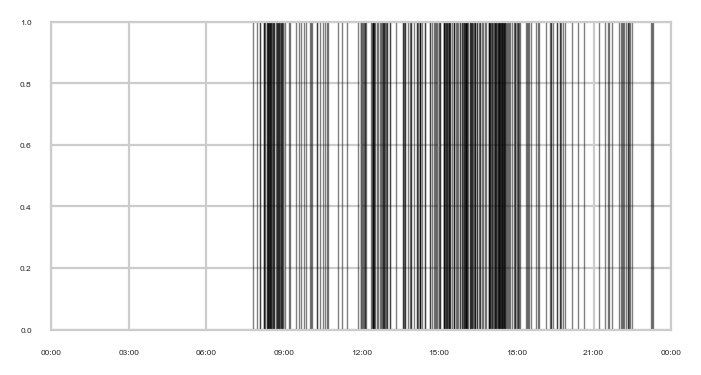

In [3]:
# Reference point (today but the choice is arbitrary)
some_day = datetime.today()
midnight = datetime.combine(some_day, time.min)
min_ts = midnight.timestamp()
max_ts = (midnight + timedelta(days=1)).timestamp()

df_onresume = df[df.event == "onResume"]

x = df_onresume.dt.map(lambda entry: entry.replace(day=some_day.day, month=some_day.month, year=some_day.year))

x = [datetime.fromtimestamp(x_.timestamp()) for x_ in x if x_ not in x]

plt.rcParams.update({'font.size': 3})
fig, ax = plt.subplots(figsize=(4, 2))
for i in range(len(x)):
    x_  = x[i]
    if i > 0 and x[i] - x[i-1] > timedelta(minutes=1):
        # val = x_.timestamp() - min_ts
        # print(val)
        ax.axvline(x_, ymin=0, ymax=1, color="black", alpha=0.5, linewidth=0.5)
    # print(x_)
    # print(datetime.fromtimestamp(x_.timestamp()))
    # ax.axvline(datetime.fromtimestamp(x_.timestamp()), ymin=0, ymax=1, color="blue", alpha=0.5)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', ))
ax.set_xlim(datetime.fromtimestamp(min_ts), datetime.fromtimestamp(max_ts));

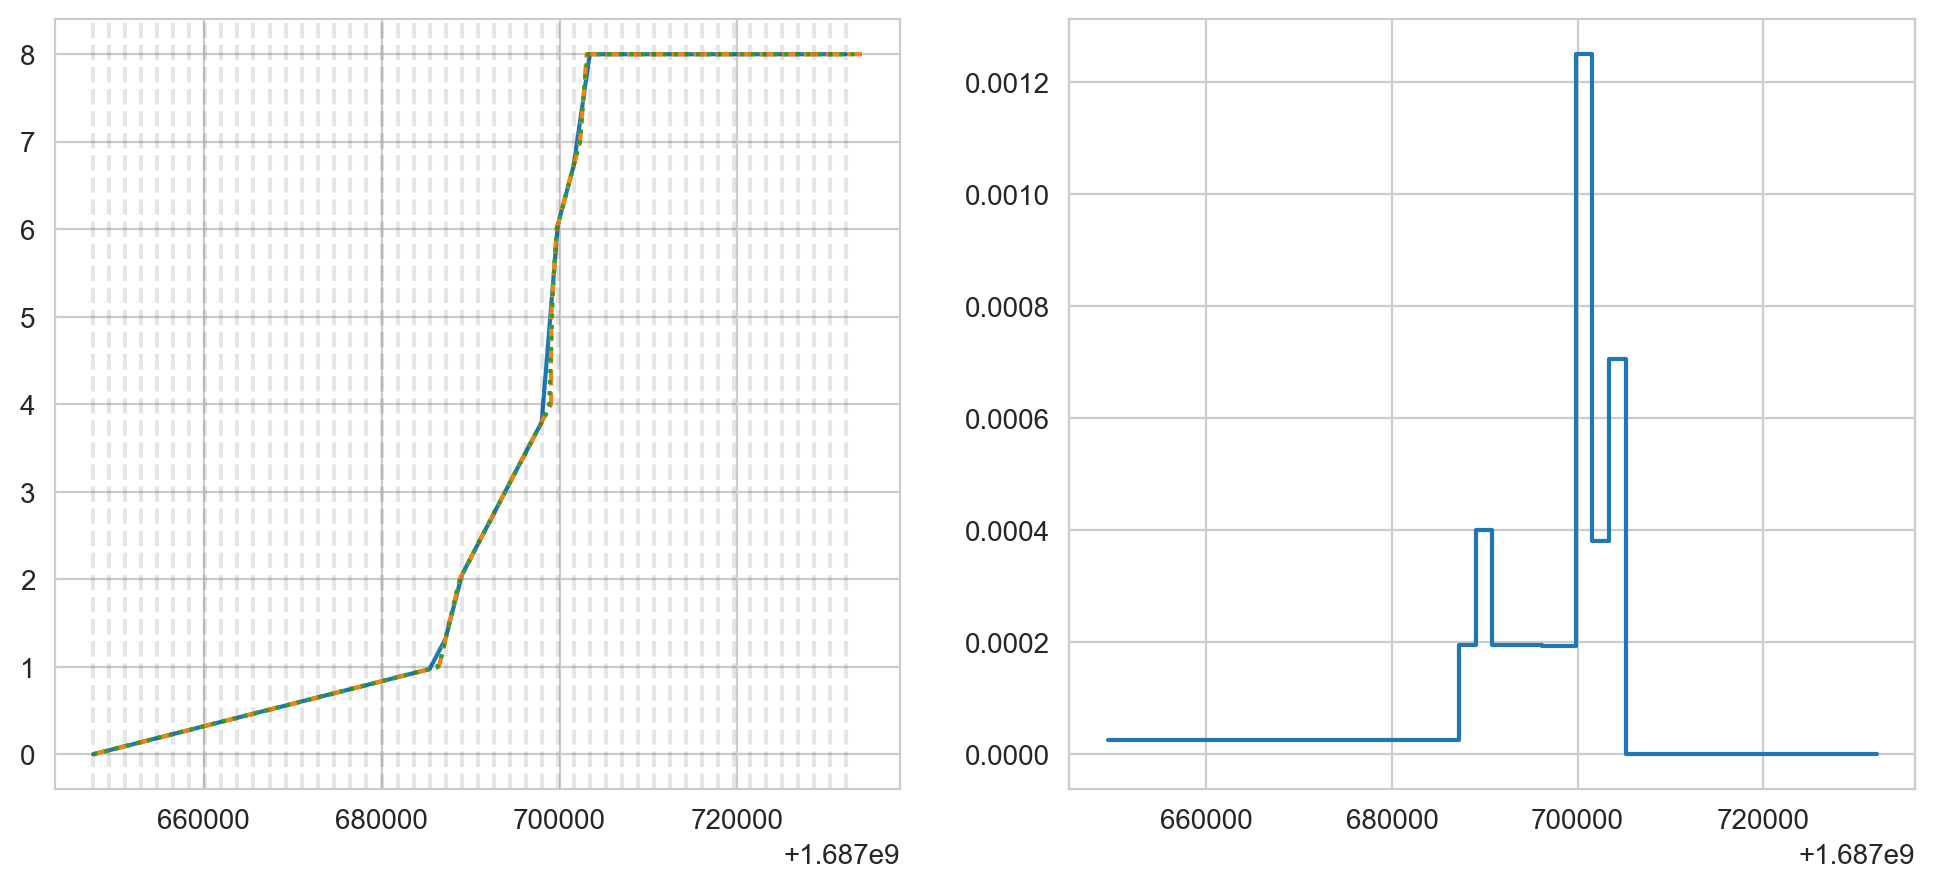

In [4]:
for date in uniq_date:

    midnight = datetime.combine(date, time.min)
    min_ts = midnight.timestamp()
    max_ts = (midnight + timedelta(days=1)).timestamp()

    df_onresume = df[(df.event == "onResume") & (df.dt.dt.date == date)]

    x = df_onresume.dt

    x_dt = [datetime.fromtimestamp(x_.timestamp()) for x_ in df_onresume.dt]
    x_ts = [x_.timestamp() for x_ in x_dt]
    x_ts.insert(0, min_ts)
    x_ts.append(max_ts)
    x_ts = np.array(x_ts)
    y = np.arange(len(x_ts))
    y[-1] = y[-2]


    plt.rcParams.update({'font.size': 10})
    fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

    ax = axes[0]

    dx = 60*30

    f = interpolate.interp1d(x_ts, y, kind="linear")
    min_val = int(x_ts.min())
    max_val = int(x_ts.max())
    n_val = max_val - min_val
    x_new = np.arange(min_val, max_val, dx)
    y_new = f(x_new)
    ax.plot(x_new, y_new)
    # plt.step(x_new, y_new, where="post")

    ax.plot(x_ts, y, linestyle="--")

    x_lin = np.linspace(min_val, max_val, 200)
    y_lin = f(x_lin)
    ax.plot(x_lin, y_lin, linestyle=":")
    for x in x_new:
        ax.axvline(x, linestyle="--", color="black", alpha=0.1)

    ax = axes[1]
    ax.step(x_new[1:], np.diff(y_new)/dx, where="post");
    break

Not enough interactions in file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28E1_interaction_2023-07-12_23-36-02.csv`
Not enough interactions in file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13SK_interaction_2023-07-12_23-36-02.csv`
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/michele_beta1_interaction_2023-07-12_23-36-02.csv`
File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/162G_interaction_2023-07-12_23-36-02.csv`


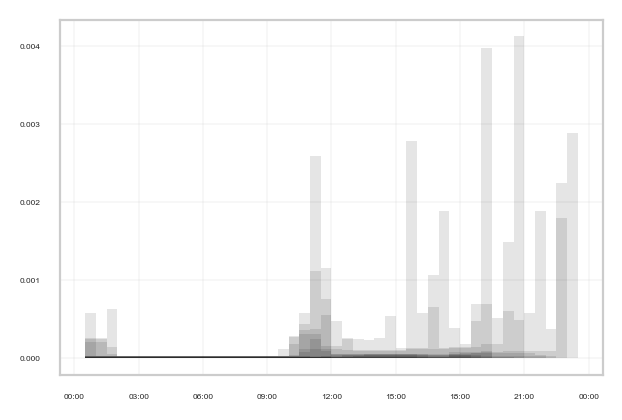

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152G_interaction_2023-07-12_23-36-02.csv`


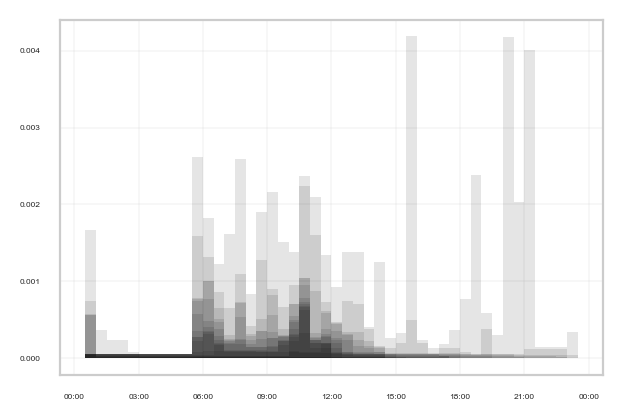

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25J1_interaction_2023-07-12_23-36-02.csv`


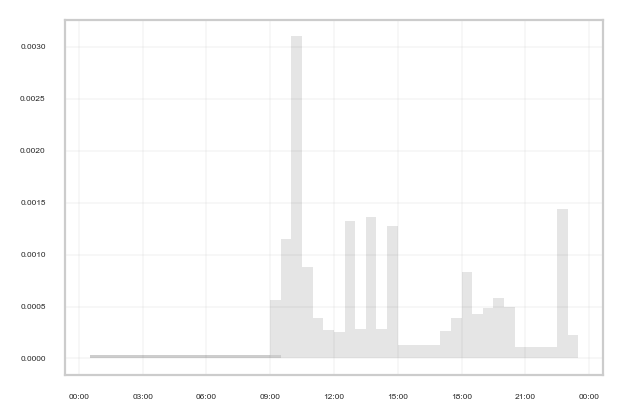

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09A1_interaction_2023-07-12_23-36-02.csv`


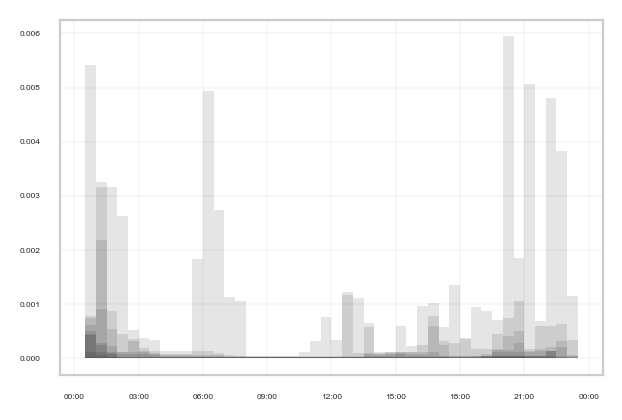

Not enough interactions in file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/23MI_interaction_2023-07-12_23-36-02.csv`
File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/19AN_interaction_2023-07-12_23-36-02.csv`


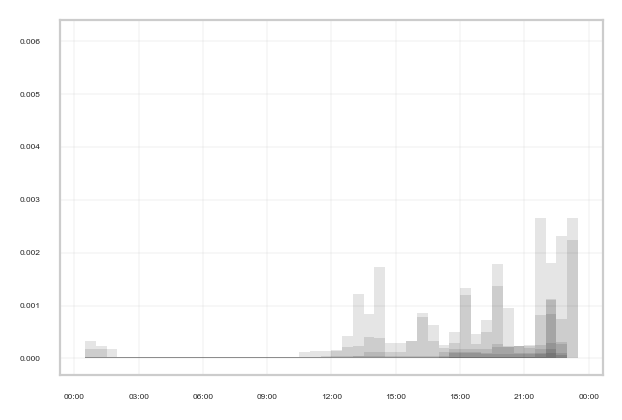

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/182E_interaction_2023-07-12_23-36-02.csv`


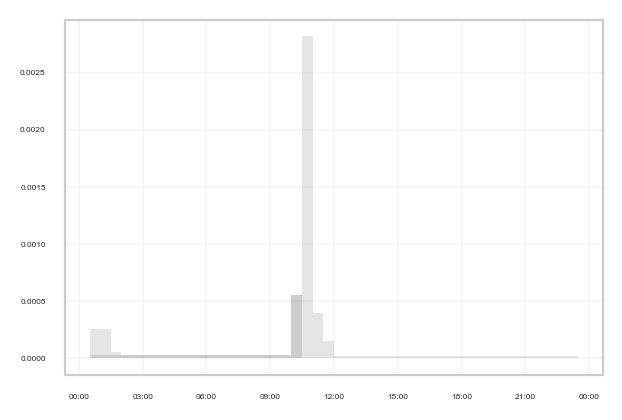

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/242K_interaction_2023-07-12_23-36-02.csv`


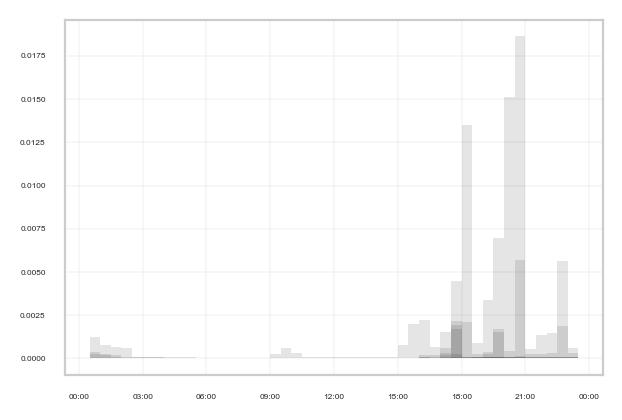

Not enough interactions in file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/07EI_interaction_2023-07-12_23-36-02.csv`
File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/252S_interaction_2023-07-12_23-36-02.csv`


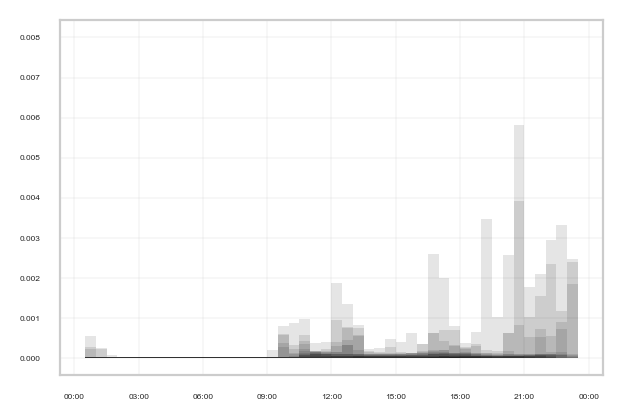

Not enough interactions in file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12AE_interaction_2023-07-12_23-36-02.csv`
File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/1362_interaction_2023-07-12_23-36-02.csv`


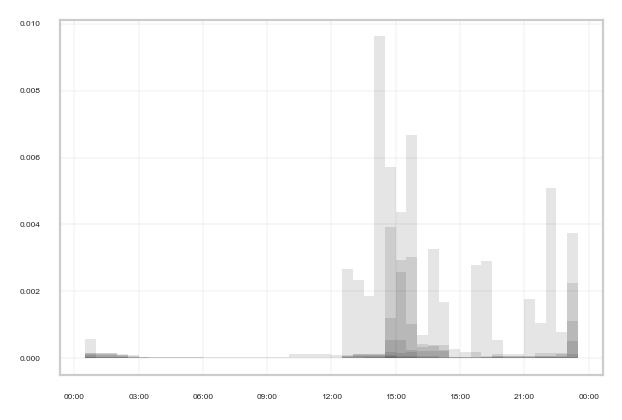

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06AS_interaction_2023-07-12_23-36-02.csv`


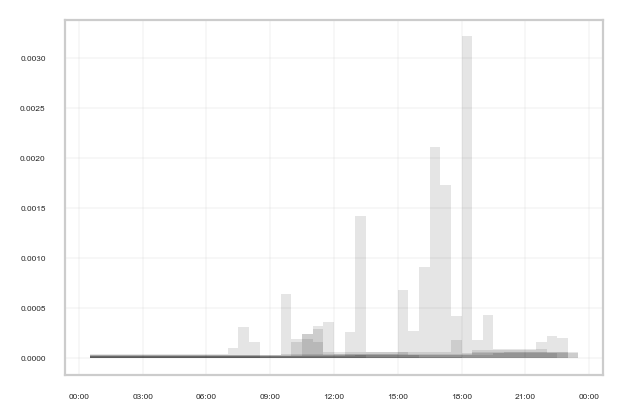

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/15SM_interaction_2023-07-12_23-36-02.csv`


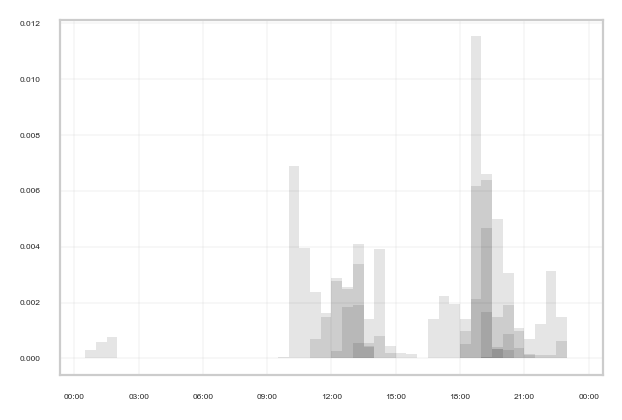

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152A_interaction_2023-07-12_23-36-02.csv`


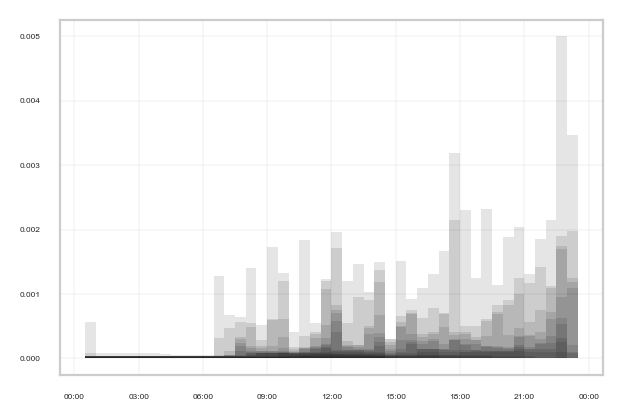

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/02MY_interaction_2023-07-12_23-36-02.csv`


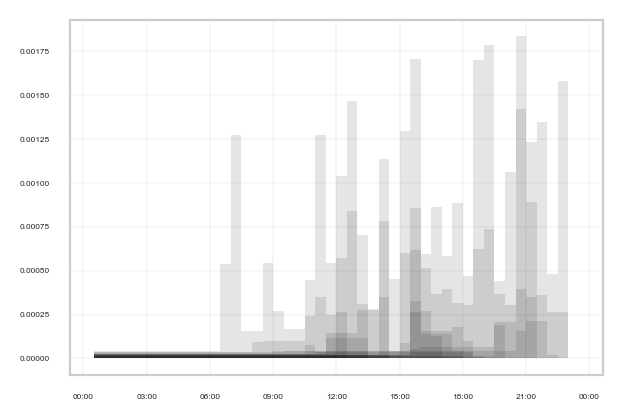

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/102P_interaction_2023-07-12_23-36-02.csv`


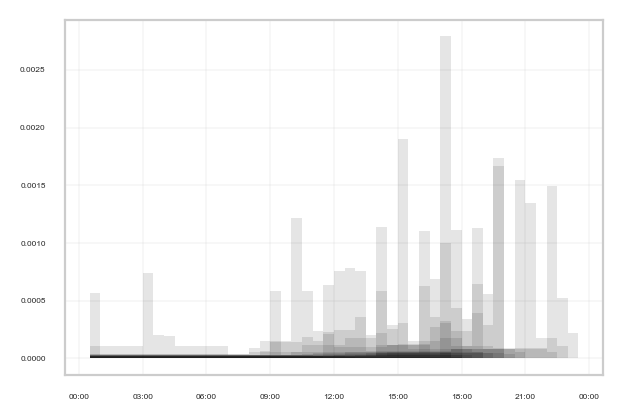

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/24SA_interaction_2023-07-12_23-36-02.csv`


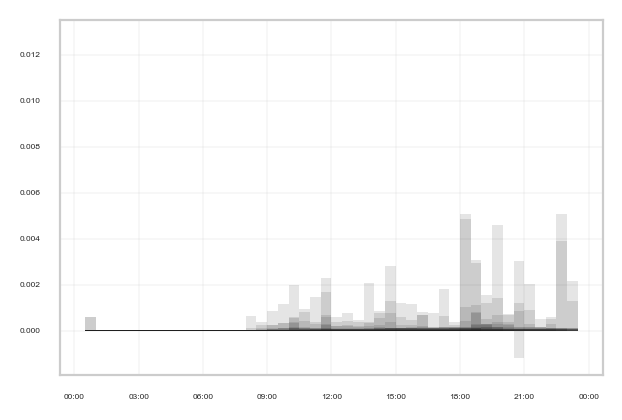

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11SA_interaction_2023-07-12_23-36-02.csv`


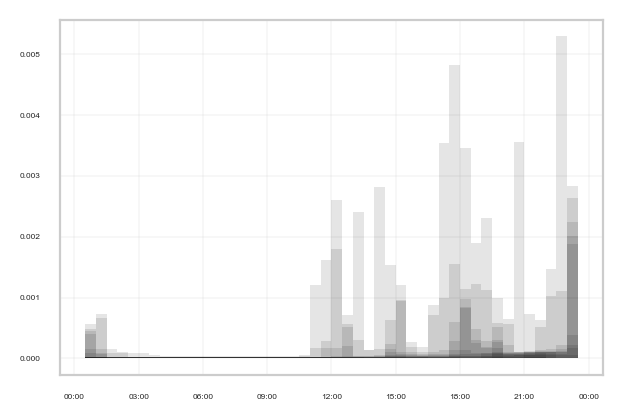

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/02TA_interaction_2023-07-12_23-36-02.csv`


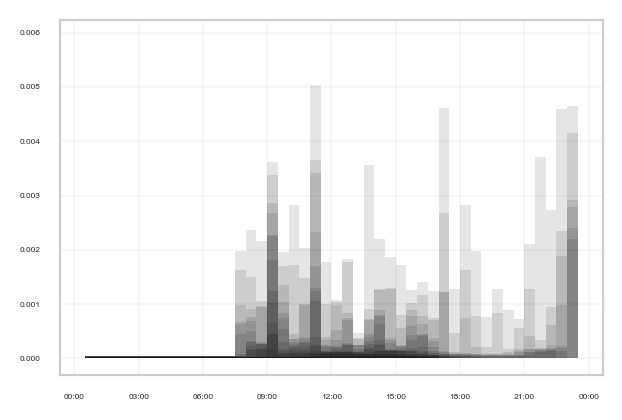

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/192Z_interaction_2023-07-12_23-36-02.csv`


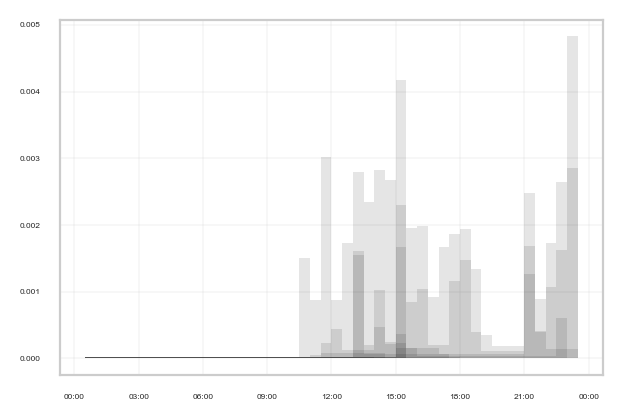

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/13KU_interaction_2023-07-12_23-36-02.csv`


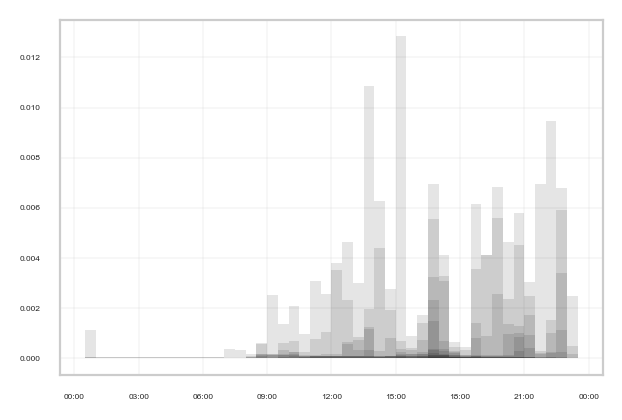

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/09AU_interaction_2023-07-12_23-36-02.csv`


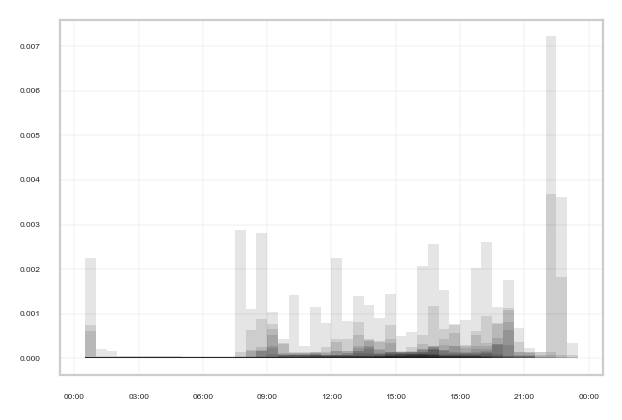

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/302M_interaction_2023-07-12_23-36-02.csv`


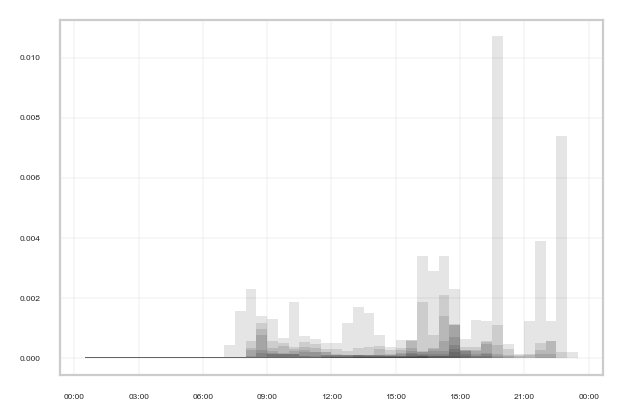

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/25TI_interaction_2023-07-12_23-36-02.csv`


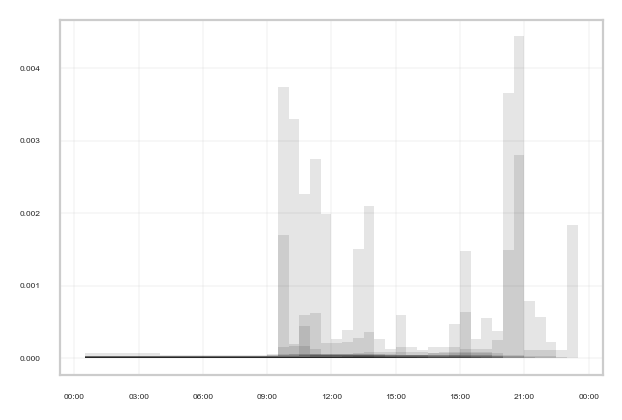

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11KD_interaction_2023-07-12_23-36-02.csv`


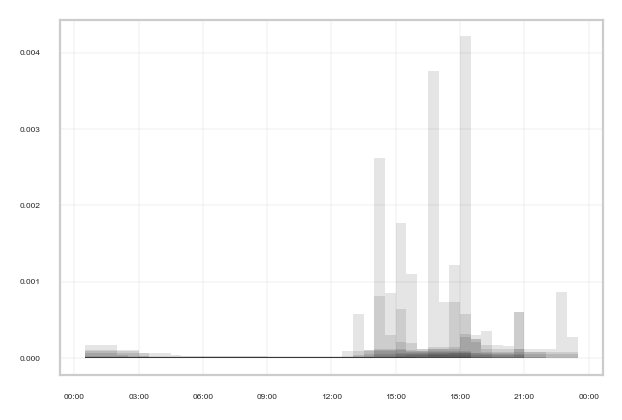

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/22MH_interaction_2023-07-12_23-36-02.csv`


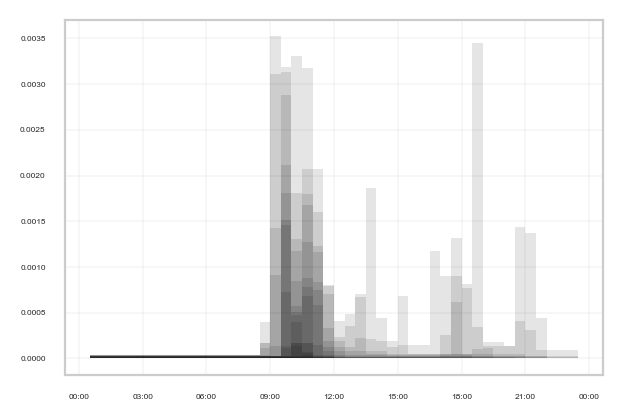

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/10AN_interaction_2023-07-12_23-36-02.csv`


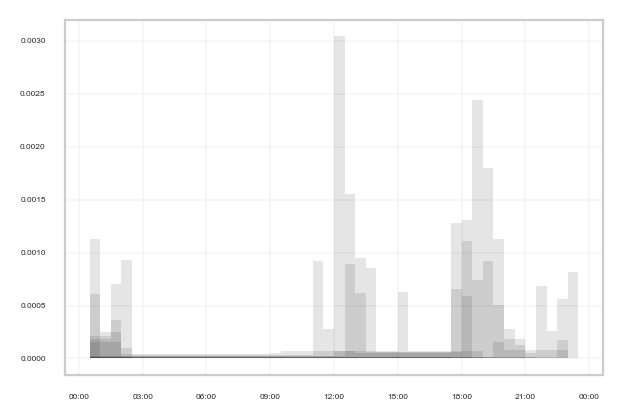

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/272W_interaction_2023-07-12_23-36-02.csv`


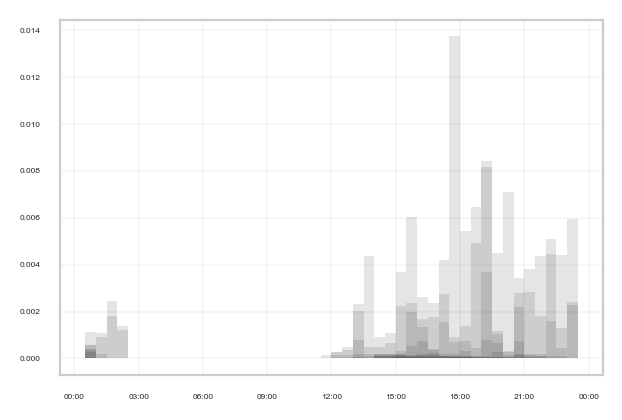

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/27SI_interaction_2023-07-12_23-36-02.csv`


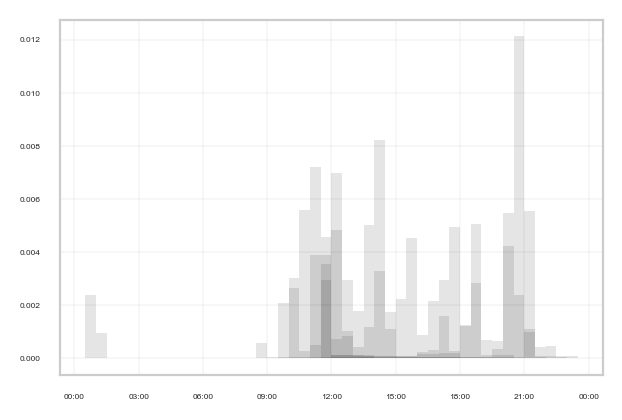

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/162W_interaction_2023-07-12_23-36-02.csv`


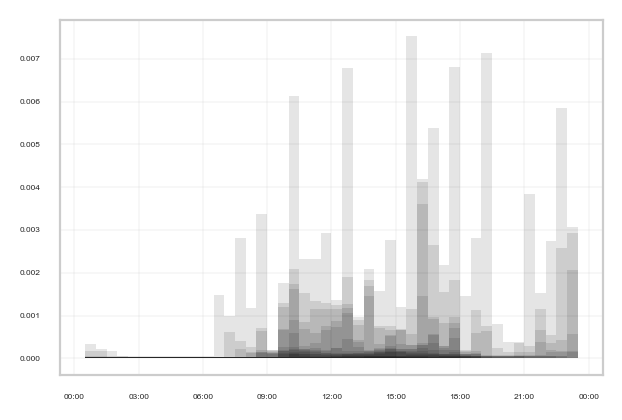

Not enough interactions in file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/06DS_interaction_2023-07-12_23-36-02.csv`
File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/28OM_interaction_2023-07-12_23-36-02.csv`


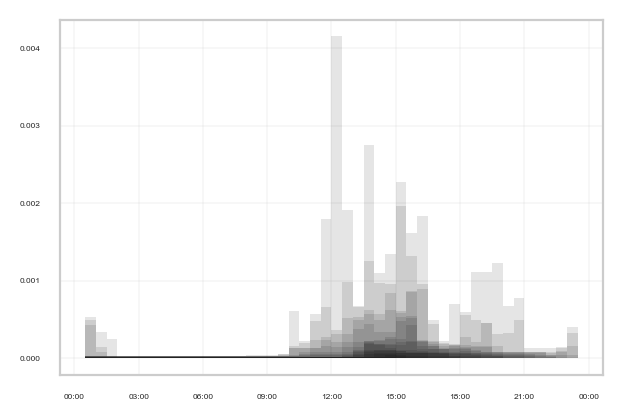

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/15MM_interaction_2023-07-12_23-36-02.csv`


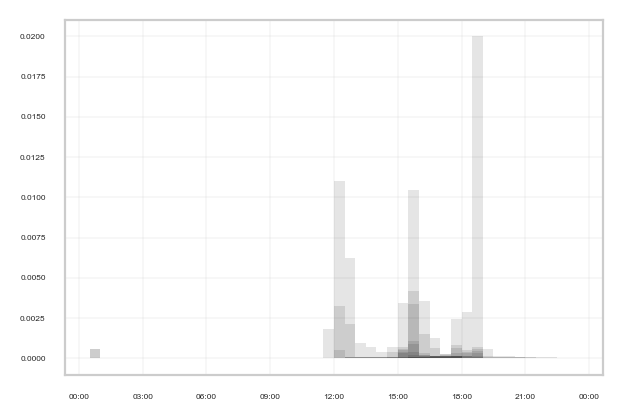

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/152O_interaction_2023-07-12_23-36-02.csv`


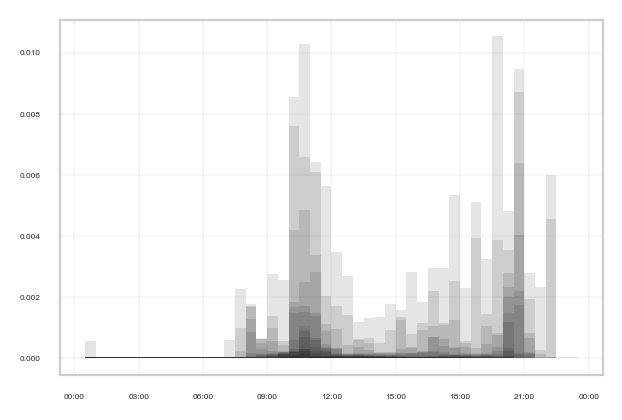

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/18DA_interaction_2023-07-12_23-36-02.csv`


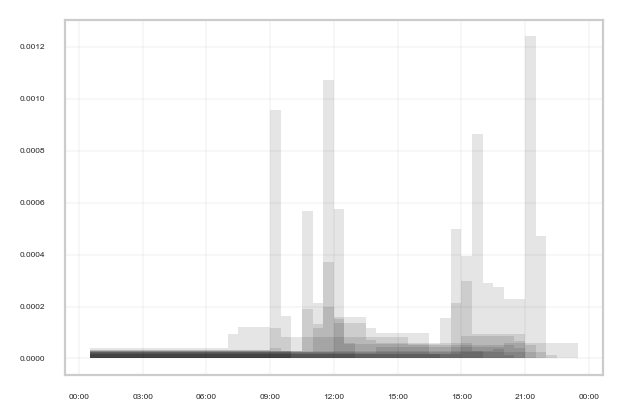

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/11AV_interaction_2023-07-12_23-36-02.csv`


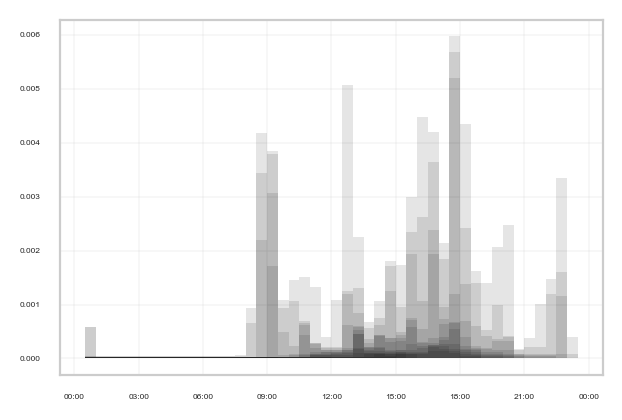

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/12JA_interaction_2023-07-12_23-36-02.csv`


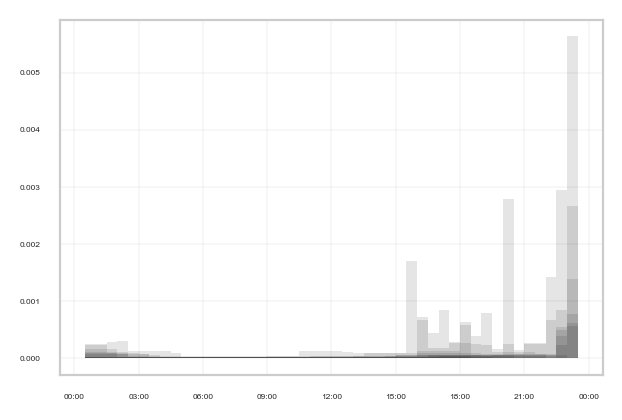

Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/student_a_beta1_interaction_2023-07-12_23-36-02.csv`
Skipping file `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/smallobj_interaction_2023-07-12_23-36-02.csv`
File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/132L_interaction_2023-07-12_23-36-02.csv`


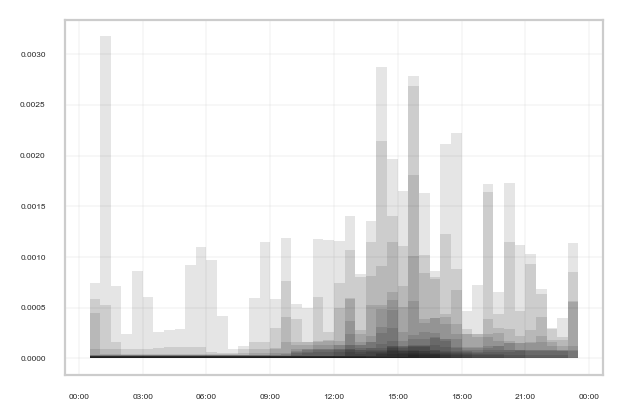

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/272L_interaction_2023-07-12_23-36-02.csv`


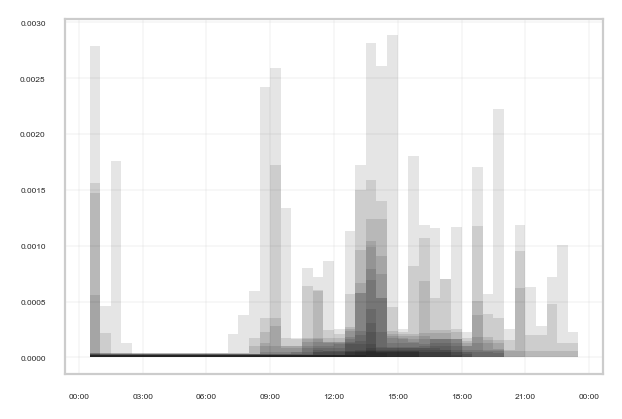

File `/Users/aureliennioche/Documents/PythonProjects/MAppServer/data/dump_latest/19EN_interaction_2023-07-12_23-36-02.csv`


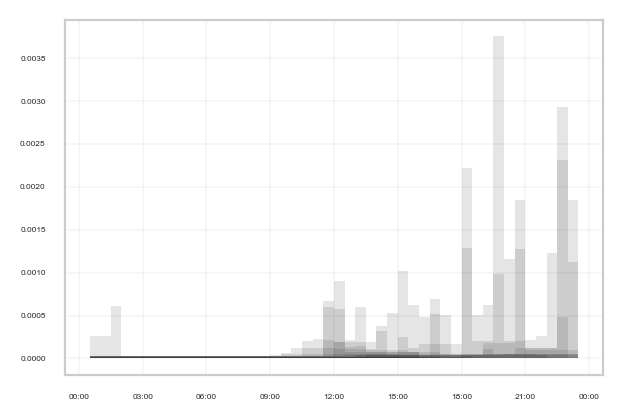

In [11]:
for file in glob.glob(f"{DOWNLOAD_FOLDER_ABSOLUTE_PATH}/*_interaction*.csv"):

    if "smallobj" in file or "michele" in file or "student" in file:
        print(f"Skipping file `{file}`")
        continue

    df = pd.read_csv(file, index_col=0)

    if len(df) < 20:
        print(f"Not enough interactions in file `{file}`")
        continue

    print(f"File `{file}`")

    df.dt = pd.to_datetime(df.dt, utc=False, format='ISO8601')
    df.dt = df.dt.dt.tz_convert('Europe/London')

    uniq_date = df.dt.dt.date.unique()

    plt.rcParams.update({'font.size': 3})
    fig, ax = plt.subplots(figsize=(3, 2))
    for date in uniq_date:

        # Reference point (today but the choice is arbitrary)
        some_day = datetime.today()
        midnight = datetime.combine(some_day, time.min)
        min_ts = midnight.timestamp()
        max_ts = (midnight + timedelta(days=1)).timestamp()

        df_onresume = df[(df.event == "onResume") & (df.dt.dt.date == date)]

        x = df_onresume.dt

        x = [x_.replace(day=some_day.day, month=some_day.month, year=some_day.year) for x_ in x]
        x_dt = [datetime.fromtimestamp(x_.timestamp()) for x_ in x]
        x_ts = [x_.timestamp() for x_ in x_dt]
        x_ts.insert(0, min_ts)
        x_ts.append(max_ts)
        x_ts = np.array(x_ts)
        y = np.arange(len(x_ts))
        y[-1] = y[-2]

        dx = 60*30

        f = interpolate.interp1d(x_ts, y, kind="linear")
        min_val = int(x_ts.min())
        max_val = int(x_ts.max())
        n_val = max_val - min_val
        x_new = np.arange(min_val, max_val, dx)
        y_new = f(x_new)

        # Compute the diff
        y_diff = np.diff(y_new)/dx
        x_diff =  [datetime.fromtimestamp(x_) for x_ in x_new[1:]]

        # Plot
        color = "black"
        ax.fill_between(x_diff, y_diff, step="post", alpha=0.1, color=color, linewidth=0)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', ))
    ax.grid(linewidth=0.1)
    fig.tight_layout()
    plt.show()